In [1]:
from sklearn.ensemble import RandomForestClassifier
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('X_train.pkl', 'rb') as input:
    X_train = pickle.load(input)
with open('y_train.pkl', 'rb') as input:
    y_train = pickle.load(input)
X_train = X_train[(y_train == 0) | (y_train == 1) | (y_train == 2)]
y_train = y_train[(y_train == 0) | (y_train == 1) | (y_train == 2)]
X_train.shape

(155576, 32)

In [3]:
forest = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=13, min_samples_split=2, 
                                min_samples_leaf=1, bootstrap=False, n_jobs=2, 
                                random_state=0, class_weight='balanced_subsample')
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
            criterion='gini', max_depth=13, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=300, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

# Accuracy Measure and HeatMap for Training Set

0.936834730293


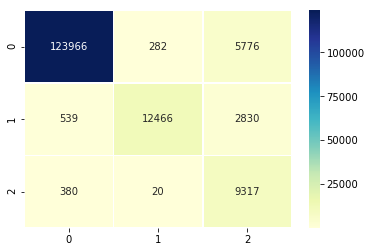

In [4]:
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = forest.predict(X_train)
print(accuracy_score(y_train,y_pred))
cm = confusion_matrix(y_train,y_pred)
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='YlGnBu')


# Individual Label Accuracy

In [5]:
fix = (cm[0][0])/(cm[1][0]+cm[2][0]+cm[0][0])
sac = (cm[1][1])/(cm[0][1]+cm[2][1]+cm[1][1])
pso = (cm[2][2])/(cm[0][2]+cm[1][2]+cm[2][2])

print("fixation: %0.2f \nsaccades: %0.2f \npso: %0.2f" % (fix, sac, pso))

fixation: 0.99 
saccades: 0.98 
pso: 0.52


In [6]:
'''
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
pred = cross_val_predict(forest, X_train, y_train, cv=3)
metrics.accuracy_score(y_train, pred)
'''

'\nfrom sklearn.model_selection import cross_val_predict\nfrom sklearn import metrics\npred = cross_val_predict(forest, X_train, y_train, cv=3)\nmetrics.accuracy_score(y_train, pred)\n'

# Cross-Validation with Test Set

In [17]:
with open('X_test.pkl', 'rb') as input:
    X_val = pickle.load(input)
with open('y_test.pkl', 'rb') as input:
    y_val = pickle.load(input)
X_val = X_val[(y_val == 0) | (y_val == 1) | (y_val == 2)]
y_val = y_val[(y_val == 0) | (y_val == 1) | (y_val == 2)]
y_val.shape

(20287,)

In [30]:
X_val_processed = []
y_val_processed = []
for i in [0,1,2]:
    X_tmp = X_val[y_val == i]
    for j in np.random.randint(len(X_tmp), size = 100000):
        X_val_processed.append(X_tmp[j])
        y_val_processed.append(i)
X_val_processed = np.array(X_val_processed)[:,:]
y_val_processed = np.array(y_val_processed)

#y_pred = forest.predict(X_val_processed)
#cm = confusion_matrix(y_val_processed,y_pred)
#sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='YlGnBu')

In [9]:
fix = (cm[0][0])/(cm[1][0]+cm[2][0]+cm[0][0])
sac = (cm[1][1])/(cm[0][1]+cm[2][1]+cm[1][1])
pso = (cm[2][2])/(cm[0][2]+cm[1][2]+cm[2][2])

print("fixation: %0.2f \nsaccades: %0.2f \npso: %0.2f" % (fix, sac, pso))

fixation: 0.85 
saccades: 0.81 
pso: 0.73


In [10]:
score = (accuracy_score(y_val_processed,y_pred))
print("Accuracy: %0.3f " % (score))

Accuracy: 0.798 


# Training and Testing Using Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression(C = 1000.0, class_weight='balanced', max_iter=100, multi_class='ovr', solver='liblinear', random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=1000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

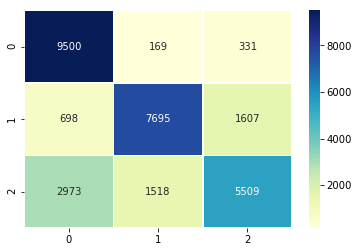

In [21]:
lr_yPred = lr.predict(X_val_processed)
lr_cm = confusion_matrix(y_val_processed, lr_yPred)
sns.heatmap(lr_cm, annot=True, fmt="d", linewidths=.5, cmap='YlGnBu')

In [22]:
fix = (lr_cm[0][0])/(lr_cm[1][0]+lr_cm[2][0]+lr_cm[0][0])
sac = (lr_cm[1][1])/(lr_cm[0][1]+lr_cm[2][1]+lr_cm[1][1])
pso = (lr_cm[2][2])/(lr_cm[0][2]+lr_cm[1][2]+lr_cm[2][2])

print("fixation: %0.2f \nsaccades: %0.2f \npso: %0.2f" % (fix, sac, pso))

fixation: 0.72 
saccades: 0.82 
pso: 0.74


In [23]:
score = (accuracy_score(y_val_processed,lr_yPred))
print("Accuracy: %0.3f " % (score))

Accuracy: 0.757 


# Testing and Trainin Using SVM

In [10]:
from sklearn.svm import SVC
X_train.shape[1]

32

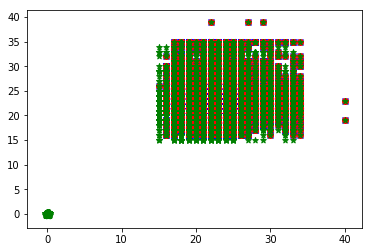

In [22]:
idx = ['x', 'o', '*']
colors = ['b', 'r', 'g']
for i in range(len(X_train[0])):
    for idx, colors in zip(idx, colors):
        plt.scatter(X_val_processed[(y_val_processed == 0), i], 
                    X_val_processed[(y_val_processed == 1), i], c=colors, marker=idx)
plt.legend
plt.show()

In [23]:
svm = SVC(C = 10.0 , degree=1, gamma=20.0, kernel = 'rbf', decision_function_shape = 'ovr', random_state=0, class_weight='balanced')
svm.fit(X_train, y_train)

SVC(C=10.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=20.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
y_pred = svm.predict(X_train)
sv_cm = confusion_matrix(y_train, y_pred)


accuracy score: 0.923645035224

number support vectors for classes:
 [35974  8524  7034]

confusion_matrix:
 Axes(0.125,0.125;0.62x0.755)


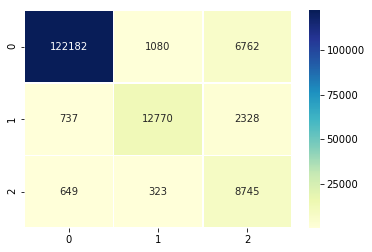

In [33]:
print('\naccuracy score:',accuracy_score(y_train, y_pred))
print('\nnumber support vectors for classes:\n',svm.n_support_)
print('\nconfusion_matrix:\n',sns.heatmap(sv_cm, annot=True, fmt="d", linewidths=.5, cmap='YlGnBu'))

In [34]:
fix = (sv_cm[0][0])/(sv_cm[1][0]+sv_cm[2][0]+sv_cm[0][0])
sac = (sv_cm[1][1])/(sv_cm[0][1]+sv_cm[2][1]+sv_cm[1][1])
pso = (sv_cm[2][2])/(sv_cm[0][2]+sv_cm[1][2]+sv_cm[2][2])

print("fixation: %0.2f \nsaccades: %0.2f \npso: %0.2f" % (fix, sac, pso))

fixation: 0.99 
saccades: 0.90 
pso: 0.49



accuracy score: 0.691256666667

confusion_matrix:
 Axes(0.125,0.125;0.62x0.755)


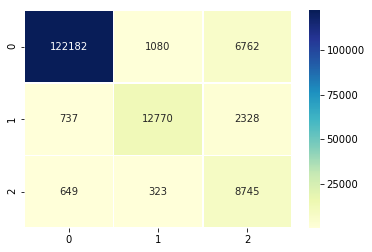

In [35]:
y_pred = svm.predict(X_val_processed)
print('\naccuracy score:',accuracy_score(y_val_processed, y_pred))
print('\nconfusion_matrix:\n',sns.heatmap(sv_cm, annot=True, fmt="d", linewidths=.5, cmap='YlGnBu'))

In [36]:
fix = (sv_cm[0][0])/(sv_cm[1][0]+sv_cm[2][0]+sv_cm[0][0])
sac = (sv_cm[1][1])/(sv_cm[0][1]+sv_cm[2][1]+sv_cm[1][1])
pso = (sv_cm[2][2])/(sv_cm[0][2]+sv_cm[1][2]+sv_cm[2][2])

print("fixation: %0.2f \nsaccades: %0.2f \npso: %0.2f" % (fix, sac, pso))

fixation: 0.99 
saccades: 0.90 
pso: 0.49
